In [1]:
%matplotlib inline
import os

import contextily as ctx
import partridge as ptg
import pandas as pd

from gtfs_router.raptor import raptor_assignment
from gtfs_router import log_stop_information

### Read in the GTFS feed
In this case, we're just using the busiest day

In [2]:
gtfs_path = os.path.join('..', 'data', 'sacramento_2021_03_15')
_date, service_ids = ptg.read_busiest_date(gtfs_path)
view = {'trips.txt': {'service_id': service_ids}}
feed = ptg.load_geo_feed(gtfs_path, view)

print('Date Selected: {}'.format(_date))

Date Selected: 2021-04-05


### Set the parameters of the search

In [3]:
# Depart at 8:30AM (in seconds)
departure_time = 8.5 * 60 * 60

# Up to two transfers are allowed
max_transfers = 2

# Northeast Sacramento
from_stop_id = '1242' #MARCONI AVE & GREENWOOD AVE (WB)

# LRT Station near Folsom
to_stop_id = '7065' #Sunrise Station (EB)

### Evaluate the potential paths and report out the fastest travel time

In [4]:
stop_state = raptor_assignment(feed, from_stop_id, to_stop_id, departure_time, feed.transfers, max_transfers)
print('Travel Time: {:.1f} minutes'.format(stop_state.get_stop(to_stop_id)['time_to_reach'] / 60))

C:\Anaconda3\envs\gtfs-router\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Travel Time: 95.0 minutes


### Describe the path as traditional transit directions with map

1: Board 25-MARCONI at MARCONI AVE & GREENWOOD AVE (WB)(1242) at 08:47:00 -> Alight at MARCONI AVE & WATT AVE (WB)(1247) at 08:53:00 

2: Walk from MARCONI AVE & WATT AVE (WB)(1247) to WATT AVE & MARCONI AVE (SB)(3078) 

3: Board 84-WATT at WATT AVE & MARCONI AVE (SB)(3078) at 09:04:00 -> Alight at FOLSOM BLVD & MANLOVE RD (WB)(2752) at 09:32:00 

4: Walk from FOLSOM BLVD & MANLOVE RD (WB)(2752) to Watt/Manlove Station (EB)(7058) 

5: Board Gold-Downtown - Folsom at Watt/Manlove Station (EB)(7058) at 09:49:00 -> Alight at Sunrise Station (EB)(7065) at 10:05:00 



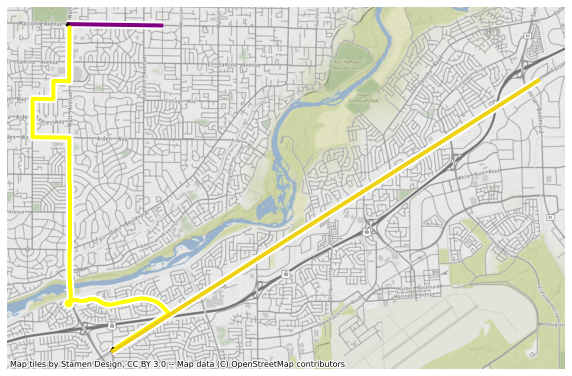

In [5]:
paths = stop_state.describe_path(to_stop_id)

paths = paths.sort_index()

for idx, desc in zip(paths.index, paths['desc']):
    print('{}: {} \n'.format(idx + 1, desc))
    
ax = paths.to_crs(epsg=3857).plot(figsize=(10, 10), color='#FFFFFF', lw=8)
paths.to_crs(epsg=3857).plot(ax=ax, color=paths['color'], lw=4)

ctx.add_basemap(ax, zoom=14)

ax.set_axis_off()